In [1]:
import seaborn

import swasputils

In [2]:
classifications = swasputils.ZooniverseClassifications().get_workflow(7534)

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
EXPERT_USERS = ('AJNORTON', 'HeidiThiemann')
expert_classifications = classifications.get_users(EXPERT_USERS)
expert_classifications.decode_annotations()

In [4]:
expert_classifications.df['user_name'].value_counts()

AJNORTON         4570
HeidiThiemann    3779
Name: user_name, dtype: int64

In [5]:
gold_standard_subjects = expert_classifications.df['subject_ids']
user_classifications = swasputils.ZooniverseClassifications(df=classifications.df[
    classifications.df['subject_ids'].isin(gold_standard_subjects) &
    ~classifications.df['user_name'].isin(EXPERT_USERS) &
    classifications.df['user_id'].notna()
].drop_duplicates(['user_id', 'subject_ids']))
user_classifications.decode_annotations()

In [6]:
user_classifications.df['expert_comparison'] = user_classifications.df.apply(
    lambda row: 'Agree' if row['annotation_T0'] in expert_classifications.df[
        expert_classifications.df['subject_ids'] == row['subject_ids']
    ]['annotation_T0'].values else 'Disagree',
    axis=1,
)

In [7]:
user_classifications.df['expert_comparison'].value_counts()

Agree       11711
Disagree     5399
Name: expert_comparison, dtype: int64

In [8]:
user_accuracy = user_classifications.df[['user_name', 'subject_ids', 'expert_comparison']].pivot_table(
    index='user_name',
    columns='expert_comparison',
    values='subject_ids',
    aggfunc=lambda x: len(x.unique())
)

In [9]:
user_accuracy_frac = user_accuracy.apply(lambda x: x/x.sum(), axis=1).fillna(0)

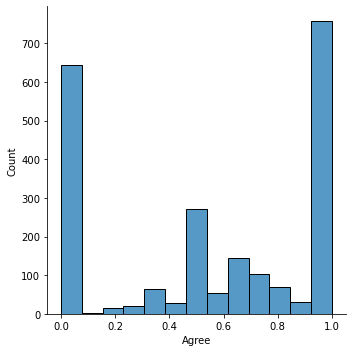

In [10]:
seaborn.displot(data=user_accuracy_frac['Agree'])